In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


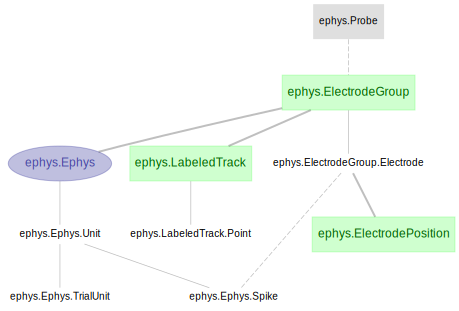

In [3]:
dj.ERD(ephys)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

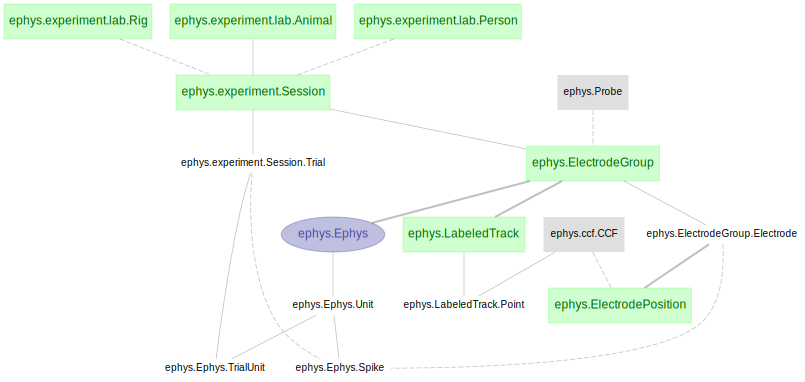

In [5]:
dj.ERD(ephys)-2

In [6]:
ephys.experiment.lab.Animal()

animal Janelia ANM ID (6 digits),dob,wr_num water restriction number
399752,2017-08-01,dl7


In [7]:
#mouse.drop()

In [8]:
mouse=ephys.experiment.lab.Animal()

In [9]:
mouse

animal Janelia ANM ID (6 digits),dob,wr_num water restriction number
399752,2017-08-01,dl7


In [10]:
#mouse.insert1((399752, '2017-08-01', 'dl7'))

In [11]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

username,fullname
daveliu,Dave Liu


In [12]:
rig=ephys.experiment.lab.Rig()
#rig.insert1(('TRig1', 'Training rig 1'))
rig

rig,rig_description
TRig1,Training rig 1


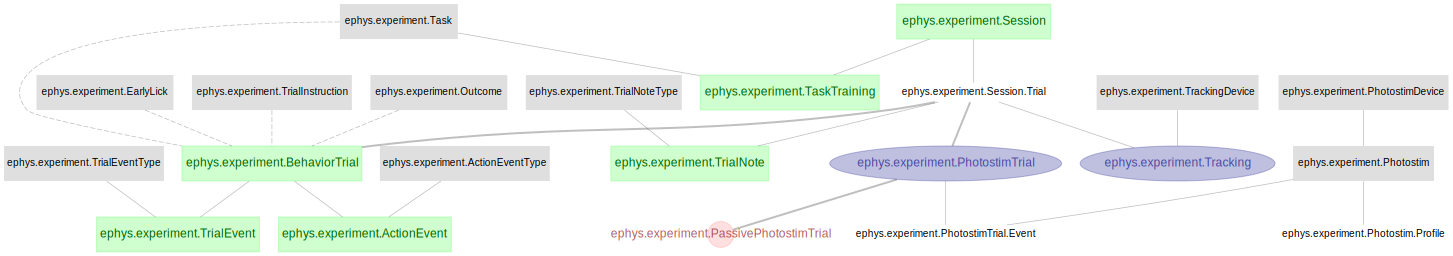

In [13]:
dj.ERD(ephys.experiment)

In [14]:
import scipy.io as spio
import numpy as np

In [15]:
mat = spio.loadmat('R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171114_144434.mat', squeeze_me=True)

In [16]:
SessionData=mat['SessionData']

In [17]:
#session.drop()

NameError: name 'session' is not defined

In [18]:
session=ephys.experiment.Session()

In [19]:
for i in range(0, 2):
    print(i)
    session.insert1((399752, i, '2017-11-14', 'daveliu', 'TRig1', 'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171114_144434.mat'))
    key=session.fetch('animal', 'session')
    key1 = 'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171114_144434.mat'
    session._make_tuples(key, key1)

0
1


TypeError: only length-1 arrays can be converted to Python scalars

In [34]:
newkey = [key[0][0] key[]

1

In [ ]:
    key=session.fetch('animal', 'session')
    key[1]

In [ ]:
session

In [ ]:
i

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
ephys.experiment.BehaviorTrial()

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
plt.axvline(protChange, linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
plt.axvline(protChange, linewidth=4, color='r')